# Úkol - příprava dat, základní statistická analýza

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

Pro tento příklad budeme používat podmnožinu s tohoto souboru.

!!! Vytvořený subset nemusí statisticky odpovídat původnímu souboru

## Sub dataset
- Data  = struktura s vyplněnými daty
- m      = počet řádků = 100
- x’s    = vstupní proměnná / features
- y’s    = výstupní promměná / target
- (x, y) = jeden řádek z training dataset
- x(2)   = (4, 5, 3374, 85)
- y(2)   = 1 050 000

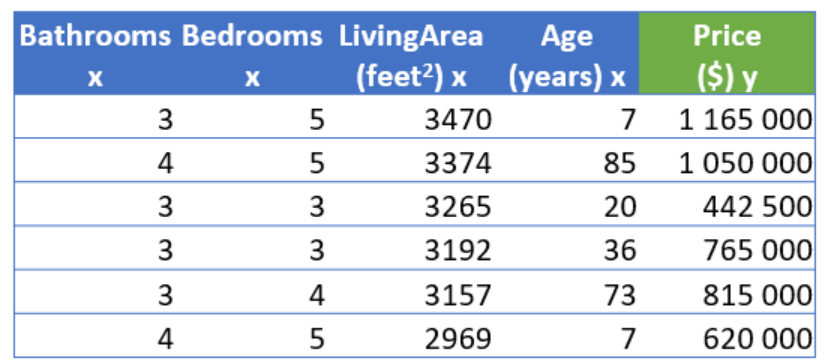

# Úkol

- Proveďte statistickou analýzu dat
- Vizualizujte data
- Vyberte vhodné proměnné pro lineární model
- Standardizujte data

## Čtení dat z CSV souboru

In [39]:
import pandas as pd 

In [40]:
data = pd.read_csv ("..\\dataset\\portland_filtered.csv",  sep=';')

## Základní charakteristiky data
- náhled dat
- zobrazení základních statistik (průměr, minimum, maximum, ...)
- kontrola NaN hodnot

In [41]:
print("\n--- Náhled dat ---")
print(data.head())


--- Náhled dat ---
   bathrooms  bedrooms  livingArea  age    price
0          3         5        3470    7  1165000
1          4         5        3374   85  1050000
2          3         3        3265   20   442500
3          3         3        3192   36   765000
4          3         4        3157   73   815000


In [42]:
print("\n--- Základní statistiky ---")
print(data.describe())


--- Základní statistiky ---
        bathrooms    bedrooms   livingArea        age         price
count  100.000000  100.000000   100.000000  100.00000  1.000000e+02
mean     2.380000    3.260000  1974.080000   49.88000  5.196074e+05
std      0.838228    0.860115   663.629851   32.77973  1.722241e+05
min      1.000000    1.000000   766.000000    3.00000  1.650000e+05
25%      2.000000    3.000000  1530.000000   20.00000  4.125000e+05
50%      2.000000    3.000000  1859.000000   47.50000  5.000000e+05
75%      3.000000    4.000000  2490.250000   75.25000  5.995312e+05
max      5.000000    6.000000  3470.000000  114.00000  1.165000e+06


In [43]:
print("\n--- Kontrola NaN hodnot ---")
print(data.isnull().sum())


--- Kontrola NaN hodnot ---
bathrooms     0
bedrooms      0
livingArea    0
age           0
price         0
dtype: int64


## Distribuce dat
- grafy s distribucí dat
- boxplot grafy
- popsat, jaká jsou data (vychýlené hodnoty, ...)

<Figure size 1200x600 with 0 Axes>

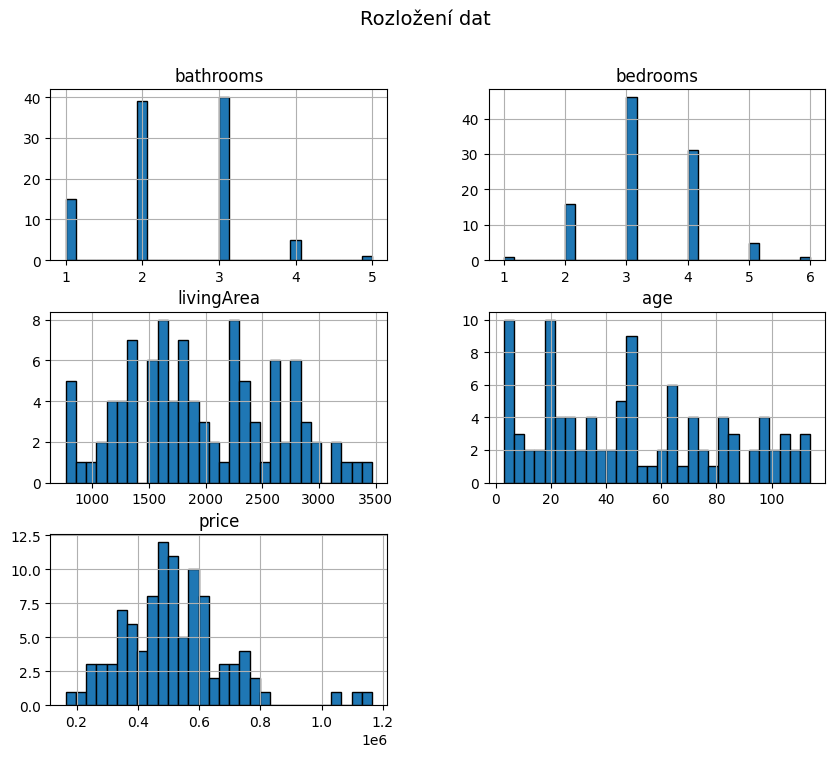

In [44]:
## Distribuce dat 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
data.hist(bins=30, figsize=(10, 8), edgecolor='black')
plt.suptitle("Rozložení dat", fontsize=14)
plt.show()

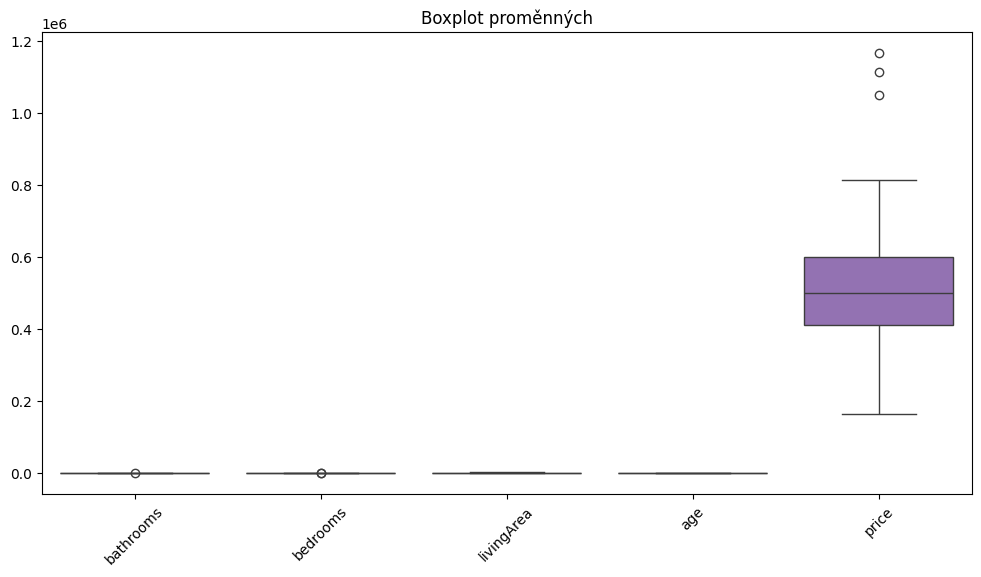

In [45]:
# Boxplot grafy pro identifikaci vychýlených hodnot 
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Boxplot proměnných")
plt.show()

## Vztahy mezi daty
- pairplot
- korelační tabulka
- Určit, které sloupce jsou lineárně závislé, vhodné pro vysvětlení price

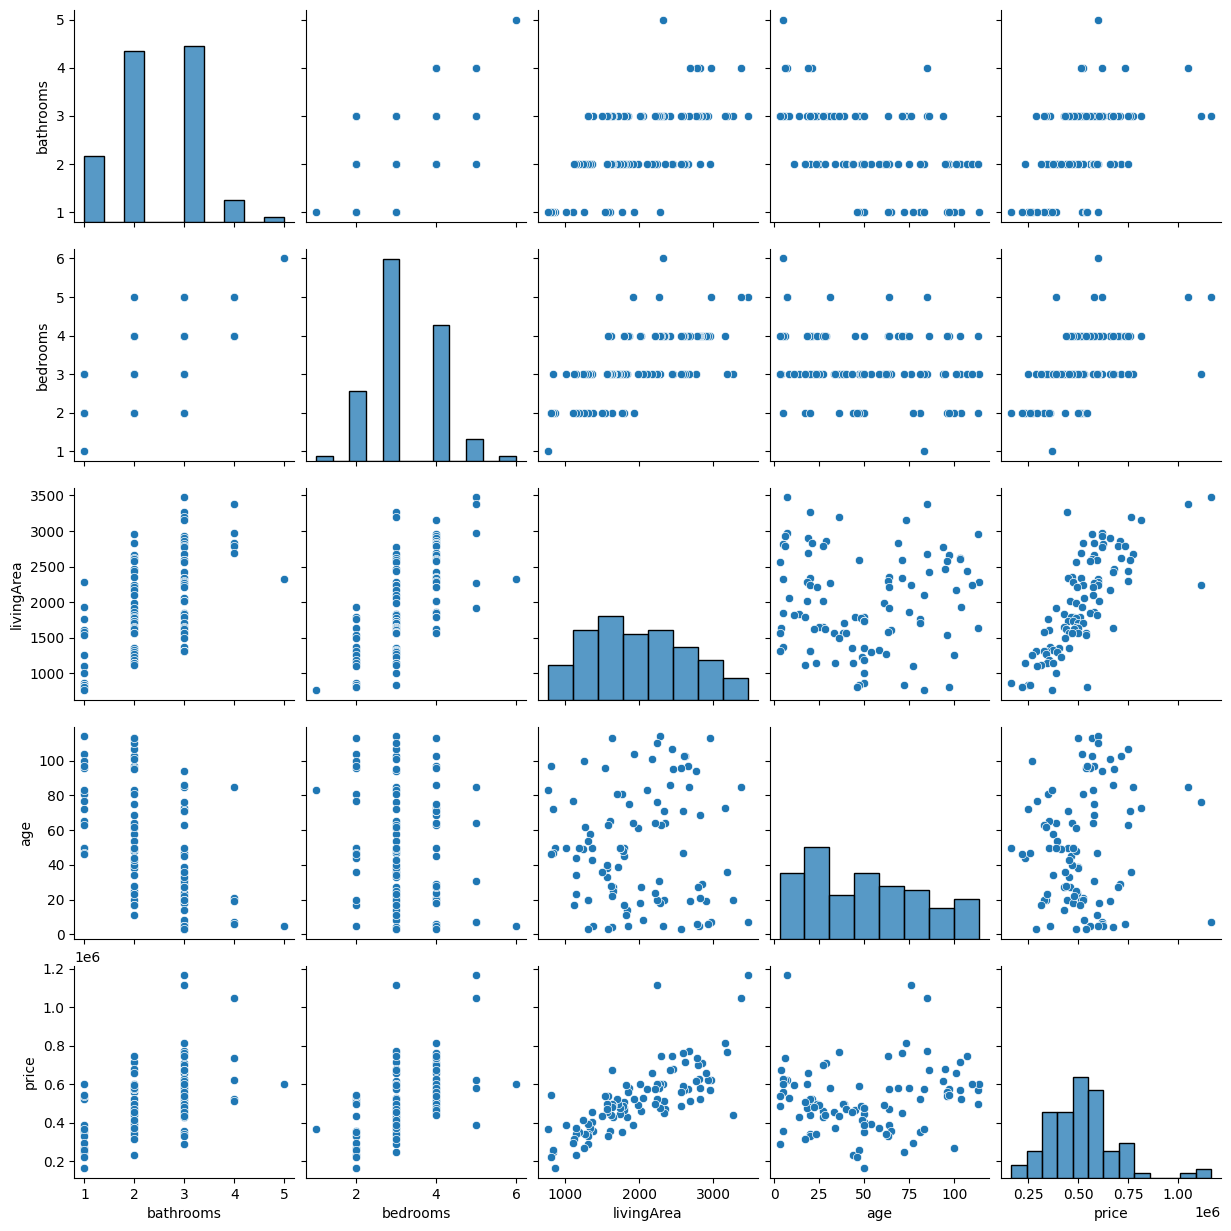

In [46]:
## Vztahy mezi daty
# Pairplot pro vizualizaci vztahů mezi proměnnými
sns.pairplot(data)
plt.show()

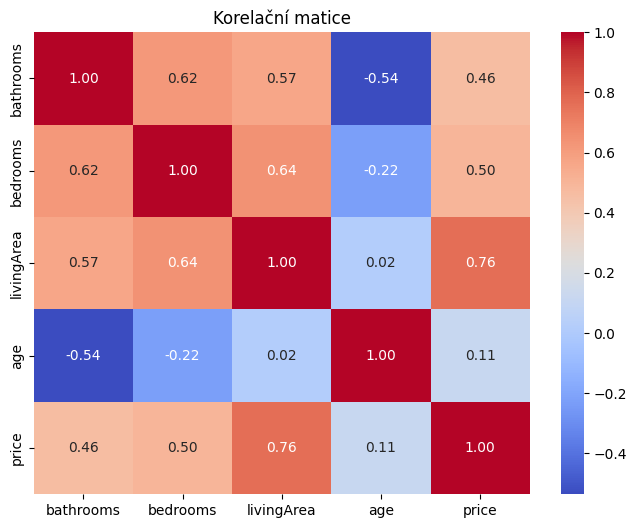

In [47]:
# Korelační tabulka
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelační matice")
plt.show()

In [48]:
# Výběr vhodných proměnných pro lineární model
features = ['bathrooms', 'bedrooms', 'livingArea', 'age']
target = 'price'

## Standardizace dat

Každá funkce má jinou střední, standardní odchylku.

Standardizační centrum a funkce měřítka.

Důvody:
* zabránit tomu, aby některé funkce modelu dominovaly
* může pomoci rychleji konvergovat modely strojového učení
* může usnadnit interpretaci koeficientů modelu strojového učení

Výpočet:
* x_new = (x – střední hodnota) / směrodatná_odchylka
* průměr = součet (x) / počet (x)
* směrodatná_odchylka = sqrt( součet ( (x – průměr)^2 ) / počet (x))

- proveďte standardizaci sloupců použitelných pro linární regresi
- zobrazte rozložení původních a standardizovaných dat

In [49]:
## Standardizace dat
data=data.dropna()

In [50]:
data["livingArea"].mean()

np.float64(1974.08)

In [51]:
data["livingArea"].std()

np.float64(663.6298511926203)

In [52]:
data['livingArea_STD'] = (data['livingArea'] - data['livingArea'].mean()) / data['livingArea'].std()
data['bathrooms_STD'] = (data['bathrooms'] - data['bathrooms'].mean()) / data['bathrooms'].std()
data['bedrooms_STD'] = (data['bedrooms'] - data['bedrooms'].mean()) / data['bedrooms'].std()
data['age_STD'] = (data['age'] - data['age'].mean()) / data['age'].std()

<Axes: xlabel='livingArea_STD', ylabel='Count'>

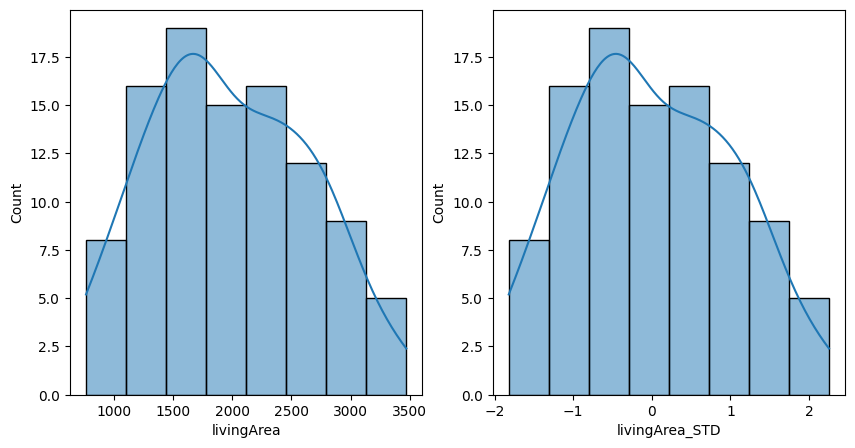

In [53]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(data['livingArea'],ax=ax1, kde=True)
sns.histplot(data['livingArea_STD'],ax=ax2, kde=True)

<Axes: xlabel='bathrooms_STD', ylabel='Count'>

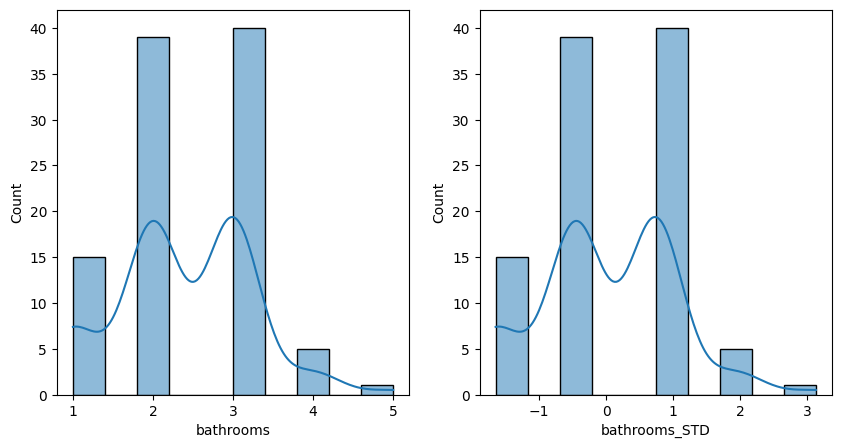

In [54]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(data['bathrooms'],ax=ax1, kde=True)
sns.histplot(data['bathrooms_STD'],ax=ax2, kde=True)

<Axes: xlabel='bedrooms_STD', ylabel='Count'>

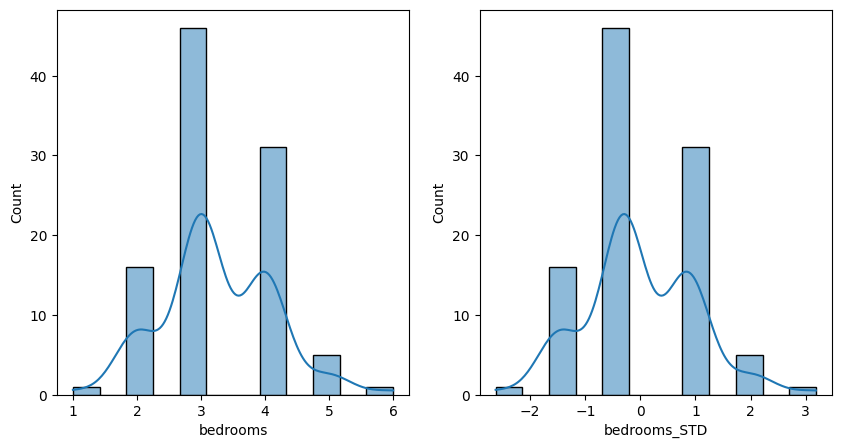

In [55]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(data['bedrooms'],ax=ax1, kde=True)
sns.histplot(data['bedrooms_STD'],ax=ax2, kde=True)

<Axes: xlabel='age_STD', ylabel='Count'>

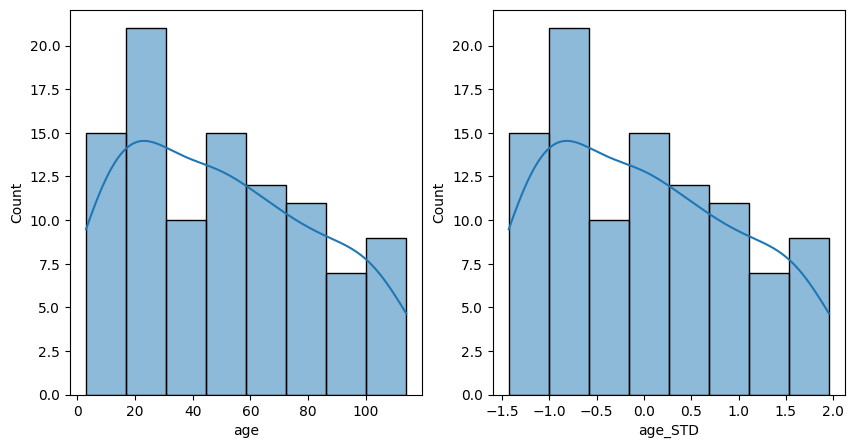

In [56]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(data['age'],ax=ax1, kde=True)
sns.histplot(data['age_STD'],ax=ax2, kde=True)